In [124]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [125]:
train_df=pd.read_csv('train.csv')
test_df=pd.read_csv('test.csv')
gender_df=pd.read_csv('gender_submission.csv')

In [126]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [127]:
test_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [128]:
train_df.isna().sum()


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [129]:
test_df.isna().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

<AxesSubplot:>

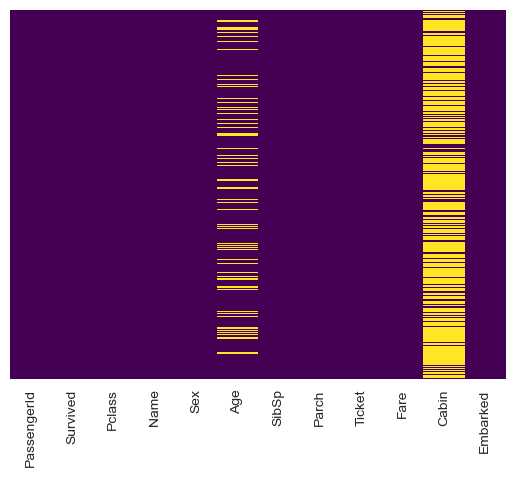

In [130]:
sns.heatmap(train_df.isnull(), yticklabels=False, cbar=False, cmap='viridis')

<AxesSubplot:xlabel='Survived', ylabel='count'>

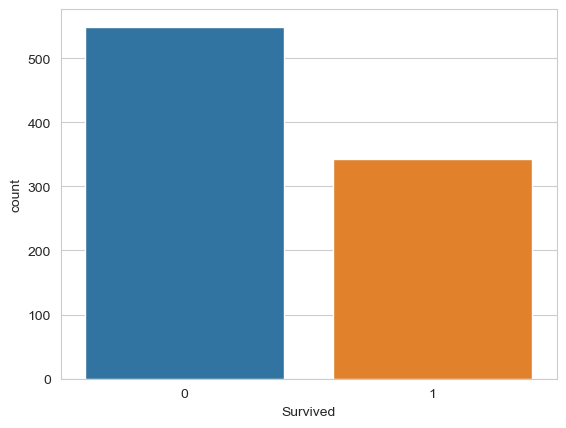

In [131]:
# visualizing how many people survived
sns.set_style('whitegrid')
sns.countplot(x='Survived', data=train_df)


<AxesSubplot:xlabel='Survived', ylabel='count'>

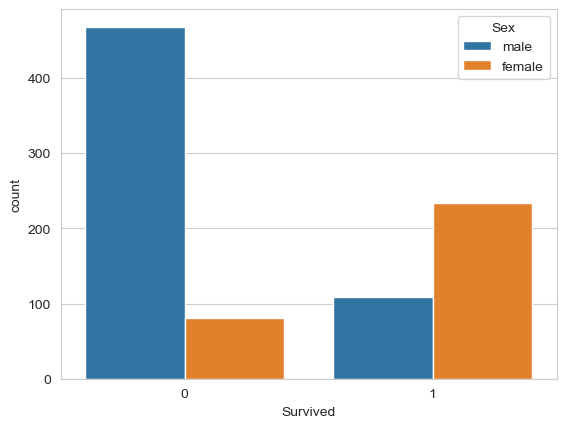

In [132]:
# visualizing how many people survived based on Gender
sns.set_style('whitegrid')
sns.countplot(x='Survived', hue='Sex', data=train_df)

<AxesSubplot:xlabel='Survived', ylabel='count'>

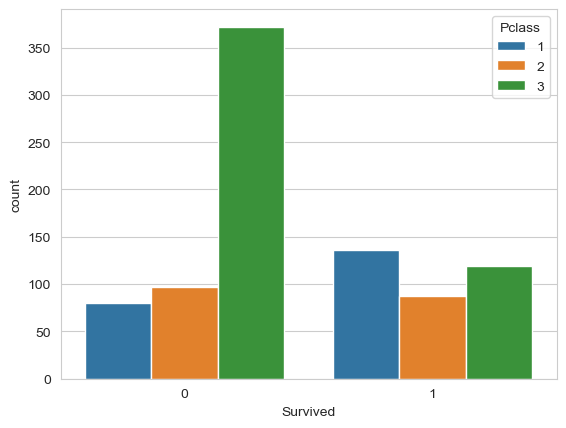

In [133]:
# visualizing how many people survived based on Class
sns.set_style('whitegrid')
sns.countplot(x='Survived', hue='Pclass', data=train_df)


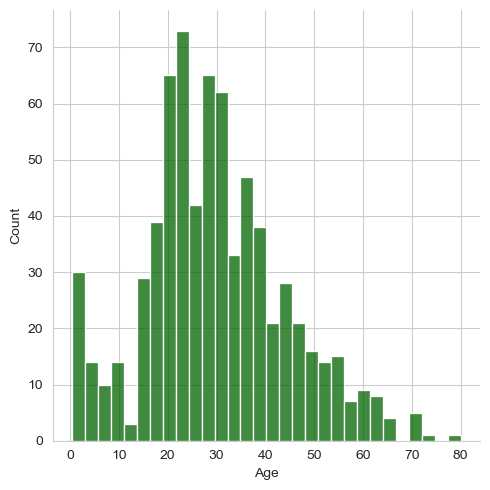

In [134]:
# visualizing age distribution (dropping missing values)
sns.displot(train_df['Age'].dropna(), kde=False, color='darkgreen', bins=30)

# concat data

In [135]:
combine = [train_df, test_df]

#extract a title for each Name in the train and test datasets
for dataset in combine:
    dataset['Title'] = dataset.Name.str.extract(' ([A-Za-z]+)\.', expand=False)

pd.crosstab(train_df['Title'], train_df['Sex'])

Sex,female,male
Title,,
Capt,0,1
Col,0,2
Countess,1,0
Don,0,1
Dr,1,6
Jonkheer,0,1
Lady,1,0
Major,0,2
Master,0,40


# encoding data

In [136]:
#replace various titles with more common names
for dataset in combine:
    dataset['Title'] = dataset['Title'].replace(['Lady', 'Capt', 'Col',
    'Don', 'Dr', 'Major', 'Rev', 'Jonkheer', 'Dona'], 'Rare')
    
    dataset['Title'] = dataset['Title'].replace(['Countess', 'Lady', 'Sir'], 'Royal')
    dataset['Title'] = dataset['Title'].replace('Mlle', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Ms', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Mme', 'Mrs')

train_df[['Title', 'Survived']].groupby(['Title'], as_index=False).mean()

,Title,Survived
0,Master,0.575000
1,Miss,0.702703
2,Mr,0.156673
3,Mrs,0.793651
4,Rare,0.285714
5,Royal,1.000000


In [137]:
#map each of the title groups to a numerical value
title_mapping = {"Mr":0,"Miss":1,"Mrs":2,"Master":0,"Dr":3,"Rev":3,"Major":3,"Mlle":1,"Col":3,"Capt":3,"Sir":3,"Ms":1,"Lady":3,"Mme":2,"Countess":3,"Jonkheer":3,"Don":3}
for dataset in combine:
    dataset['Title'] = dataset['Title'].map(title_mapping)
    dataset['Title'] = dataset['Title'].fillna(0)

train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,2.0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,2.0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0.0


In [138]:
combine.Age.describe()

AttributeError: 'list' object has no attribute 'Age'

# drop name

In [ ]:
#train_df.drop(columns = "Name", inplace = True)
#test_df.drop(columns = "Name", inplace = True)
#train_df = train_df.drop(['Cabin'], axis = 1)
#test_df = test_df.drop(['Cabin'], axis = 1)

In [ ]:
train_df = train_df.drop(["PassengerId","Ticket",'Cabin','Name'], axis = 1)
test_df = test_df.drop(["PassengerId","Ticket",'Name','Cabin'], axis = 1)

# Embarked feature

In [ ]:
#now we need to fill in the missing values in the Embarked feature
print("Number of people embarking in Southampton (S):")
southampton = train_df[train_df["Embarked"] == "S"].shape[0]
print(southampton)

print("Number of people embarking in Cherbourg (C):")
cherbourg = train_df[train_df["Embarked"] == "C"].shape[0]
print(cherbourg)

print("Number of people embarking in Queenstown (Q):")
queenstown = train_df[train_df["Embarked"] == "Q"].shape[0]
print(queenstown)

In [ ]:
#replacing the missing values in the Embarked feature with S
train_df = train_df.fillna({"Embarked": "S"})